## Decision Trees with wine data

In [147]:
# Initial imports
import psycopg2
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [148]:
# Created a connection string to connect to the AWS database
conn = psycopg2.connect(host="dbfinalproject.c5qdbdj5dsfl.us-east-2.rds.amazonaws.com", port = 5432, database="dbRedwine", user="postgres", password="Raindrops12")

In [149]:
# Query run of all the data from the redwine table in pgadmin

df_wine = pd.read_sql("""
SELECT * FROM redwine  
""",con= conn)

df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [150]:
# Query run of all the data from the quality_description table in pgadmin

df_qualitydes = pd.read_sql("""
SELECT * FROM quality_description
""",con= conn)

df_qualitydes.head()

,quality,description
0,0,Not Good
1,1,Not Good
2,2,Not Good
3,3,Not Good
4,4,Average


In [151]:
## Joined the two tables
df_joined = pd.read_sql("""
SELECT a.*,b.description FROM redwine a inner join quality_description b on a.quality = b.quality 
""",con= conn)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,description
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average


## Loading and Preprocessing Wine Data

In [152]:
# Define features set
X = df.copy()
X = X.drop(columns =["quality", "description"])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [153]:
# Define target vector
y = df["description"].values.reshape(-1, 1)
y[:5]

array([['Average'],
       ['Average'],
       ['Average'],
       ['Good'],
       ['Average']], dtype=object)

In [154]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1199, 11)
(400, 11)
(1199, 1)
(400, 1)


In [156]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

In [157]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1279, 11)
(320, 11)
(1279, 1)
(320, 1)


In [158]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [159]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [160]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [161]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [162]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

In [163]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

In [164]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [165]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,162,37
Actual 1,45,156


Accuracy Score : 0.795
Classification Report
              precision    recall  f1-score   support

     Average       0.78      0.81      0.80       199
        Good       0.81      0.78      0.79       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.80      0.79       400



In [166]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,162,37
Actual 1,45,156


Accuracy Score : 0.795
Classification Report
              precision    recall  f1-score   support

     Average       0.78      0.81      0.80       199
        Good       0.81      0.78      0.79       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.80      0.79       400



## Visualizng the Decision Tree

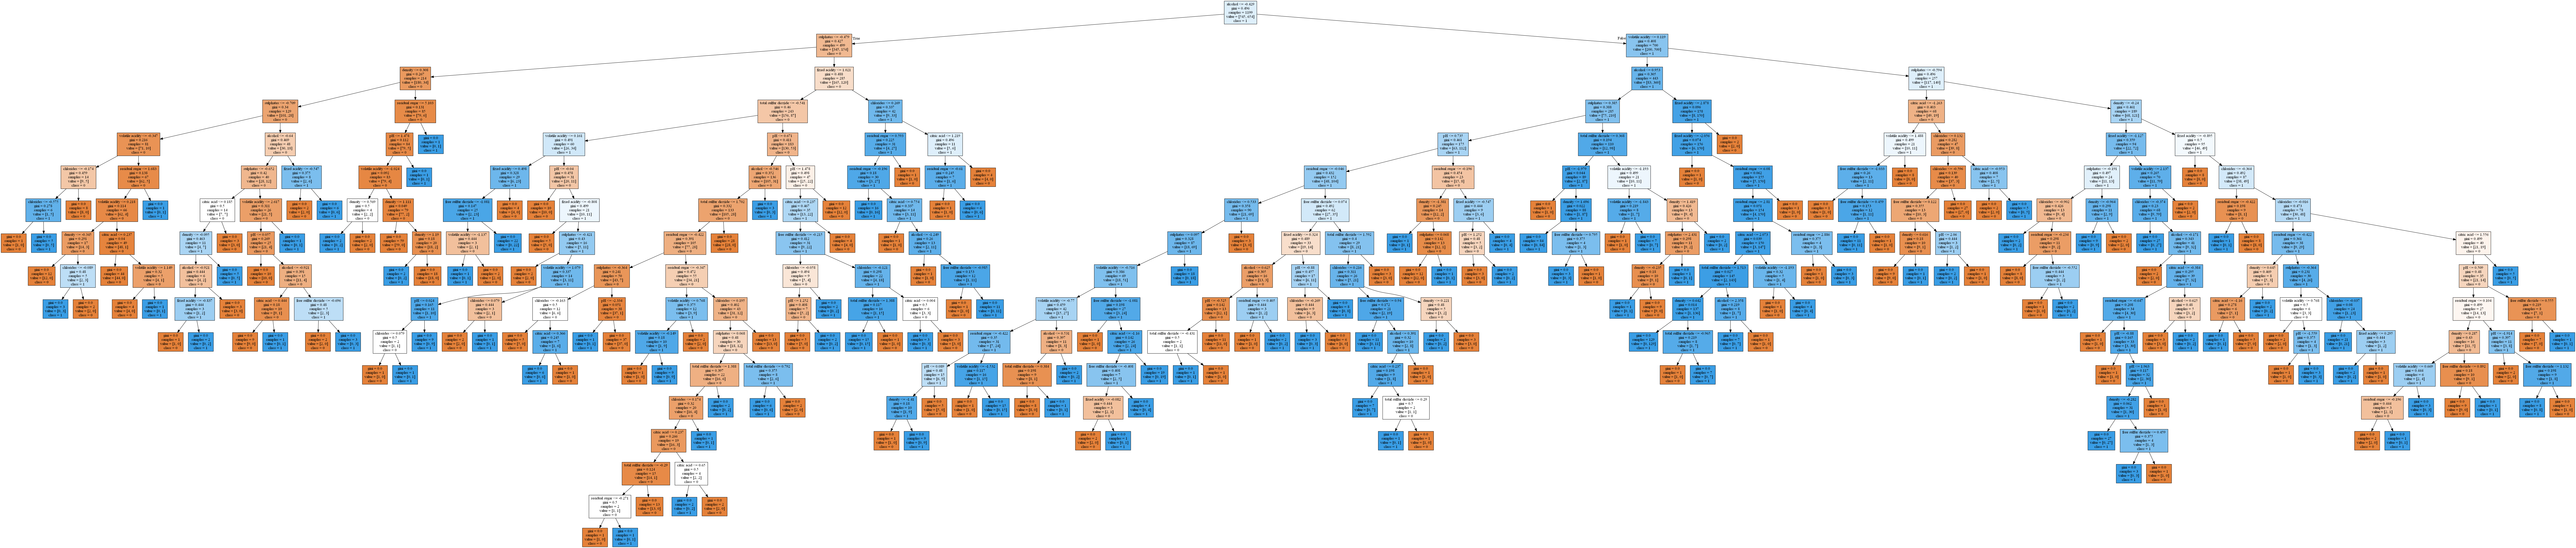

In [167]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=["0", "1"],
    filled=True
)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [168]:
 # Saving the tree as PDF
file_path = Path("Resources/wine_tree.pdf")
graph.write_pdf(file_path)
# Saving the tree as PNG
file_path = Path("Resources/wine_tree.png")
graph.write_png(file_path)

True